In [181]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import proj3d

In [36]:
%matplotlib inline

In [534]:
def f(x, y):
    return x + y

x = np.linspace(0, 20, 80)
y = np.linspace(0, 10, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

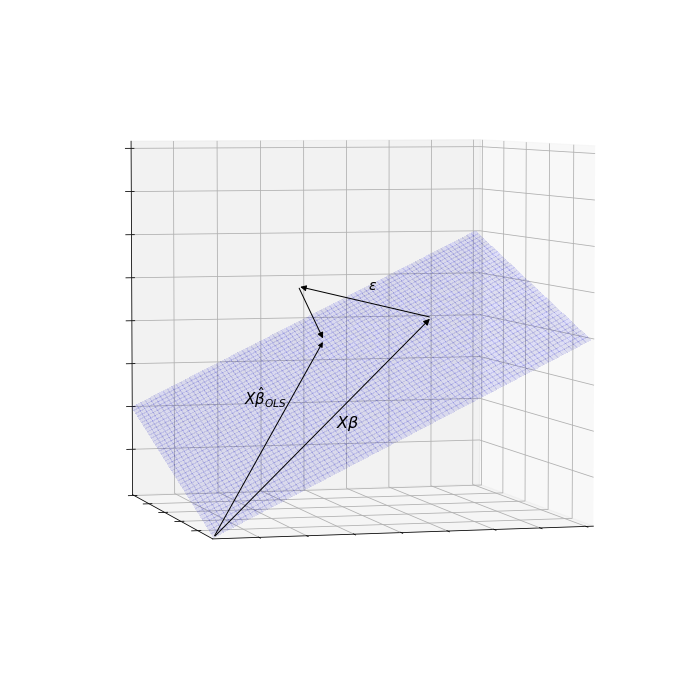

In [535]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d', elev=4, azim=255)
ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlim3d(0.5, 20)
ax.set_ylim3d(0.5, 10)
ax.set_zlim3d(0.5, 40)

a = Arrow3D([0, 15], [0, 6], [0, 21], mutation_scale=13,
            lw=1, arrowstyle="-|>", color="k")
ax.text(8, 3, 10, r"$X\beta$", color='k', size=16)
ax.add_artist(a)

b = Arrow3D([15, 7], [6, 5], [21, 25], mutation_scale=12,
            lw=1, arrowstyle="-|>", color="k")
ax.text(12, 7, 24, r"$\epsilon$", color='k', size=14)
ax.add_artist(b)

c = Arrow3D([7, 10], [5, 8], [25, 18], mutation_scale=12,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(c)

d = Arrow3D([0, 10], [0, 8], [0, 18], mutation_scale=10,
            lw=1, arrowstyle="-|>", color="k")
ax.text(4, 5, 12, r"$X\hat{\beta}_{OLS}$", color='k', size=15)
ax.add_artist(d)

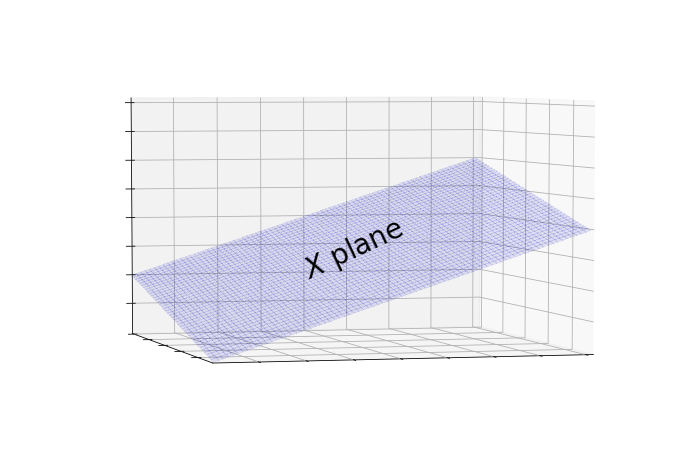

In [661]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d', elev=4, azim=255)
ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlim3d(0.5, 20)
ax.set_ylim3d(0.5, 10)
ax.set_zlim3d(0.5, 40)

ax.text(7, 5, 18, r"$X$ plane", (1, 1, 0.10), color='k', size=28)
fig.savefig(fname="img/xplane.png", pad_inches=0, bbox_inches='tight')

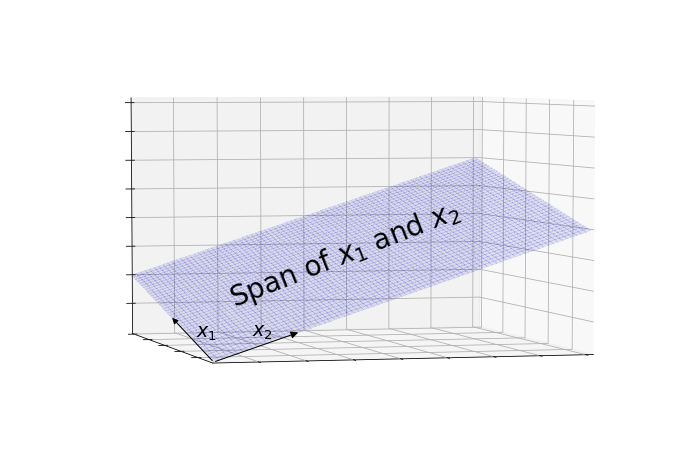

In [672]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d', elev=4, azim=255)
ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlim3d(0.5, 20)
ax.set_ylim3d(0.5, 10)
ax.set_zlim3d(0.5, 40)

a = Arrow3D([0, 0], [0, 5], [0, 5], mutation_scale=12,
            lw=1, arrowstyle="-|>", color="k")
ax.text(0, 2, 3, r"$x_1$", color='k', size=19)
ax.add_artist(a)
b = Arrow3D([0, 4.5], [0, 0], [0, 4.5], mutation_scale=15,
            lw=1, arrowstyle="-|>", color="k")
ax.text(2, 0, 4, r"$x_2$", color='k', size=19)
ax.add_artist(b)
ax.text(3, 5, 21, r"Span of $x_1$ and $x_2$", (1, 1, 0.10), color='k', size=28)
fig.savefig(fname="img/xspan.png", pad_inches=0, bbox_inches='tight')
plt.show()

In [354]:
# normal vector is [1, 1, -1]
nvec = np.cross([0,5,5], [1,0,1])

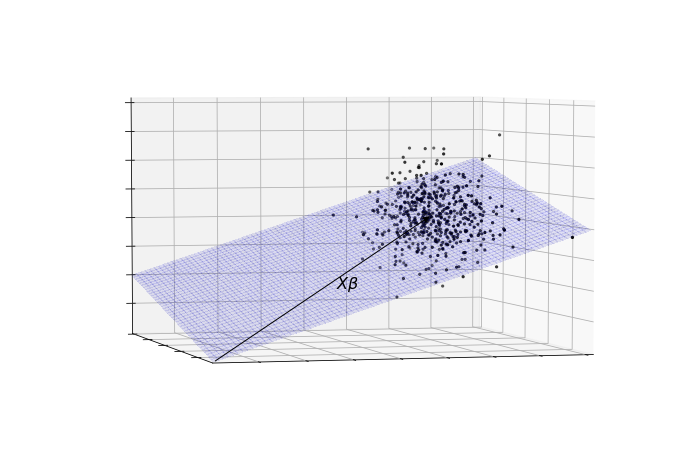

In [678]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d', elev=4, azim=255)
ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlim3d(0.5, 20)
ax.set_ylim3d(0.5, 10)
ax.set_zlim3d(0.5, 40)

a = Arrow3D([0, 15], [0, 6], [0, 21], mutation_scale=13,
            lw=1, arrowstyle="-|>", color="k")
ax.text(8, 3, 10, r"$X\beta$", color='k', size=16)
ax.add_artist(a)

'''b = Arrow3D([15, 9], [6, 7], [21, 26], mutation_scale=12,
            lw=1, arrowstyle="-|>", color="k")
ax.text(12, 7, 24, r"$\epsilon$", color='k', size=14)
ax.add_artist(b)
'''
from scipy import stats


sigma = 1.5
nx = np.random.normal(15, sigma, 500)
ny = np.random.normal(6, sigma, 500)
nz = np.random.normal(21, 3*sigma, 500)
nxyz = np.vstack([nx,ny,nz])
kde = stats.gaussian_kde(nxyz)
density = kde(nxyz)
ax.scatter(nx, ny, nz, marker='.', color='k')
fig.savefig(fname="img/cloud.png", pad_inches=0, bbox_inches='tight')
plt.show()

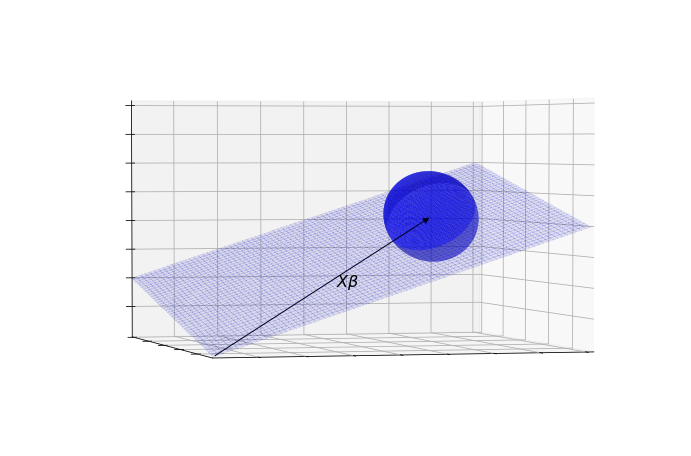

In [767]:

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d', elev=2, azim=255)
ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False, zorder=0.5)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlim3d(0.5, 20)
ax.set_ylim3d(0.5, 10)
ax.set_zlim3d(0.5, 40)

a = Arrow3D([0, 15], [0, 6], [0, 21], mutation_scale=13,
            lw=1, arrowstyle="-|>", color="k")
ax.text(8, 3, 10, r"$X\beta$", color='k', size=16)
ax.add_artist(a)

'''b = Arrow3D([15, 9], [6, 7], [21, 26], mutation_scale=12,
            lw=1, arrowstyle="-|>", color="k")
ax.text(12, 7, 24, r"$\epsilon$", color='k', size=14)
ax.add_artist(b)
'''

# u and v are parametric variables.
# u is an array from 0 to 2*pi, with 16 elements
u=np.r_[0:2*np.pi:60j]
v=np.r_[0:0.5*np.pi:60j]
# x, y, and z are the coordinates of the points for plotting
# each is arranged in a 100x100 array
nx= np.outer(np.cos(u), np.sin(v))
ny= np.outer(np.sin(u), np.sin(v))
nz= np.outer(np.ones(np.size(u)), np.cos(v))
#toprot = np.array([[1,0,0], [0,1,0], [0,0,-1]])
toprot = np.array([[1,    0, -0.5],
                   [0,  0.5, -0.5],
                   [0.2,0.5, 0.5]])
botrot = np.array([[1,    0,  0.5], 
                   [0,  0.5,  0.5], 
                   [0.2,0.5, -0.5]])

txyz = np.matmul(toprot, np.vstack([nx.reshape(-1), ny.reshape(-1), nz.reshape(-1)]))
tx = 15 + 2.5 *   txyz[0].reshape(60,60)
ty =  6 + 0.8 *   txyz[1].reshape(60,60)
tz = 21 + 10.5 *   txyz[2].reshape(60,60)
ax.plot_surface(tx, ty, tz, alpha=0.7, color='b', 
               rstride=1, cstride=1, linewidth=1, zorder=1)

bxyz = np.matmul(botrot, np.vstack([nx.reshape(-1), ny.reshape(-1), nz.reshape(-1)]))
bx = 15 + 2.5 *   bxyz[0].reshape(60,60)
by =  6 + 0.8 *  bxyz[1].reshape(60,60)
bz = 21 + 10.5 *   bxyz[2].reshape(60,60)
ax.plot_surface(bx, by, bz, alpha=0.4, color='b', 
               rstride=1, cstride=1, linewidth=1, zorder=0)
fig.savefig(fname="img/sphere.png", pad_inches=0, bbox_inches='tight')
plt.show()

In [388]:
len(top_nx.compressed())

792

In [480]:
top_nz

array([list([29.0, 28.98903627803659, 28.956175162946188, 28.901506724761102, 28.825180805870446, 28.727406610312546, 28.60845213036123, 28.468643411977613, 28.308363661140806, 28.128052193506942, 27.92820323027551, 27.709364543563392, 27.47213595499958, 27.217167691655767, 26.945158603819152, 26.65685424949238, 26.353044850870866, 26.034563128398702, 25.702282018339787, 25.35711228012022, 25.0, 24.631923997916374, 24.2538931446064, 23.866943596362404, 23.47213595499958, 23.070552360820166, 22.663293526542077, 22.251475720321846, 21.83622770614123, 21.418687649943553, 21.0, 20.58131235005645, 20.163772293858774, 19.748524279678154, 19.336706473457927, 18.929447639179834, 18.52786404500042, 18.1330564036376, 17.7461068553936, 17.368076002083626, 17.0, 16.642887719879788, 16.297717981660217, 15.965436871601302, 15.646955149129138, 15.34314575050762]),
       list([29.0, 28.98903627803659, 28.956175162946188, 28.901506724761102, 28.825180805870446, 28.727406610312546, 28.60845213036123, 2